In [444]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from statsmodels.tsa.seasonal import seasonal_decompose

## Oil price data
* ### weekly oil price data ($/gallon) from 1996 to 2024
## Observations:
* ### from 1996 to 2002 news are repeated for several weeks, so data will be considered for modelling from 2003
* ### Yearly average price of gasoline dropped during 2008 to 2008, 2012 to 2016, 2018 to 2020, 2022 to 2024.
* ### There is an increasing trend in the price


In [165]:
path = Path.cwd()/'data'/'gasoline.csv'
data = pd.read_csv(path)
data.head(3)

,date,OT,Weekly East Coast All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon),Weekly New England (PADD 1A) All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon),Weekly Central Atlantic (PADD 1B) All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon),Weekly Lower Atlantic (PADD 1C) All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon),Weekly Midwest All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon),Weekly Gulf Coast All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon),Weekly Rocky Mountain All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon),Weekly West Coast All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon),start_date,end_date,prior_history_avg,prior_history_std,Final_Search_2,Final_Search_4,Final_Search_6,Final_Output
0,1996-01-01,1.129,1.132,1.234,1.198,1.079,1.104,1.110,1.150,1.222,1996-01-01,1996-01-07,1.126,NaN,Available facts are as follows: 1995-10-16: Th...,Available facts are as follows: 1995-10-16: Th...,Available facts are as follows: 1995-10-16: Th...,Based on the provided textual information from...
1,1996-01-08,1.139,1.135,1.235,1.199,1.084,1.124,1.116,1.169,1.222,1996-01-08,1996-01-14,1.132,NaN,Available facts are as follows: 1995-10-16: Th...,Available facts are as follows: 1995-10-16: Th...,Available facts are as follows: 1995-10-16: Th...,Here is a concise prediction about the Gasolin...
2,1996-01-15,1.145,1.146,1.239,1.202,1.100,1.122,1.134,1.159,1.227,1996-01-15,1996-01-21,1.131,NaN,Available facts are as follows: 1995-10-16: Th...,Available facts are as follows: 1995-10-16: Th...,Available facts are as follows: 1995-10-16: Th...,Based on the historical data and trends from 1...


In [182]:
print(f"Shape of the data - {data.shape}")

Shape of the data - (1479, 17)


In [167]:
data['date'] = pd.to_datetime(data['date'])
data['date'].dtype

dtype('<M8[ns]')

In [276]:
data.index[500]

Timestamp('2005-08-01 00:00:00')

In [170]:
data.set_index('date', inplace=True)

In [212]:
oil_price = data[['OT', 'Final_Search_6']]
oil_price.columns = ['price', 'news']
oil_price.head(3)

,price,news
date,,
1996-01-01,1.129,Available facts are as follows: 1995-10-16: Th...
1996-01-08,1.139,Available facts are as follows: 1995-10-16: Th...
1996-01-15,1.145,Available facts are as follows: 1995-10-16: Th...


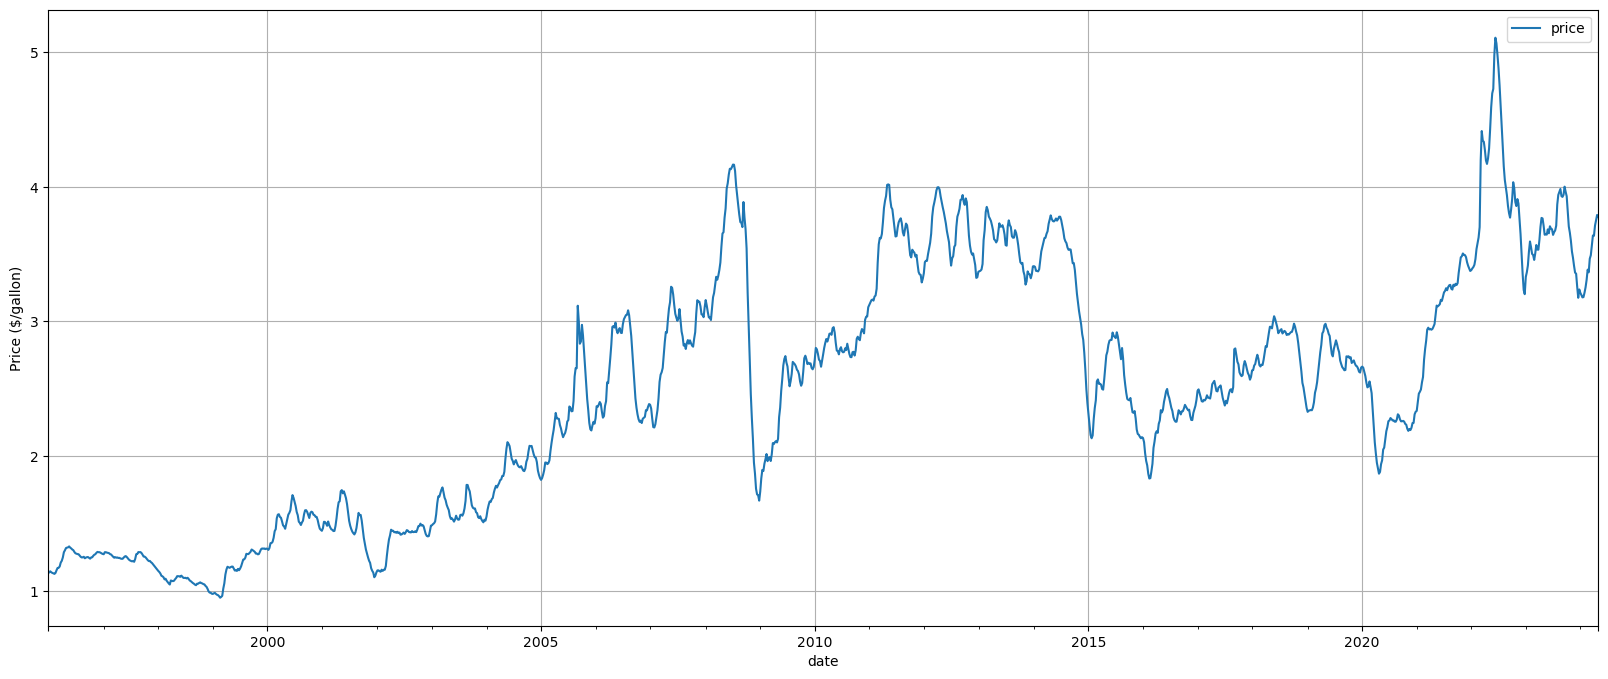

In [436]:
oil_price.plot(figsize=(20,8))
plt.ylabel('Price ($/gallon)')
plt.grid()

plt.show()


In [338]:
last_news_date = oil_price.index[0]
last_news = oil_price.loc[last_news_date].news
repeats = 0
for date in oil_price.index[1:]:
    curr_news = oil_price.loc[date].news
    if last_news == curr_news:
        repeats += 1
    else:
        if repeats > 0:
            print(f"News repeat from {last_news_date} to {date}")
        repeats = 0
        last_news_date = date
        last_news = curr_news

News repeat from 1996-01-01 00:00:00 to 1996-02-26 00:00:00
News repeat from 1996-02-26 00:00:00 to 1996-04-01 00:00:00
News repeat from 1996-04-01 00:00:00 to 1997-06-16 00:00:00
News repeat from 1997-06-16 00:00:00 to 1997-08-04 00:00:00
News repeat from 1997-08-04 00:00:00 to 1998-07-06 00:00:00
News repeat from 1998-07-06 00:00:00 to 1998-11-02 00:00:00
News repeat from 1998-11-02 00:00:00 to 1999-03-01 00:00:00
News repeat from 1999-03-01 00:00:00 to 2002-01-28 00:00:00
News repeat from 2002-01-28 00:00:00 to 2002-02-25 00:00:00
News repeat from 2002-03-11 00:00:00 to 2002-04-08 00:00:00
News repeat from 2002-05-13 00:00:00 to 2002-05-27 00:00:00
News repeat from 2002-07-01 00:00:00 to 2002-07-15 00:00:00
News repeat from 2002-12-02 00:00:00 to 2002-12-16 00:00:00
News repeat from 2008-01-21 00:00:00 to 2008-02-04 00:00:00


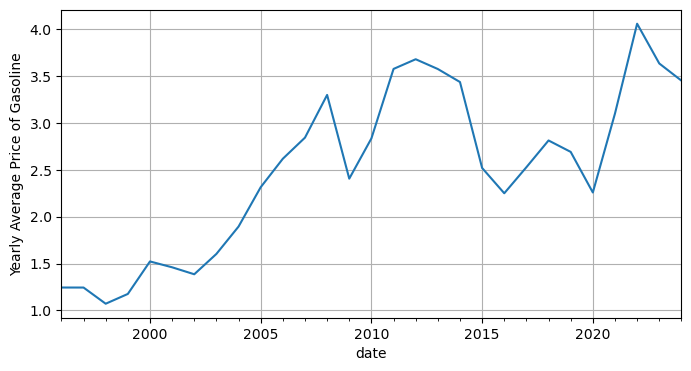

In [452]:
oil_price.price.resample("YE").mean().plot(figsize=(8,4))
plt.ylabel("Yearly Average Price of Gasoline")
plt.grid()

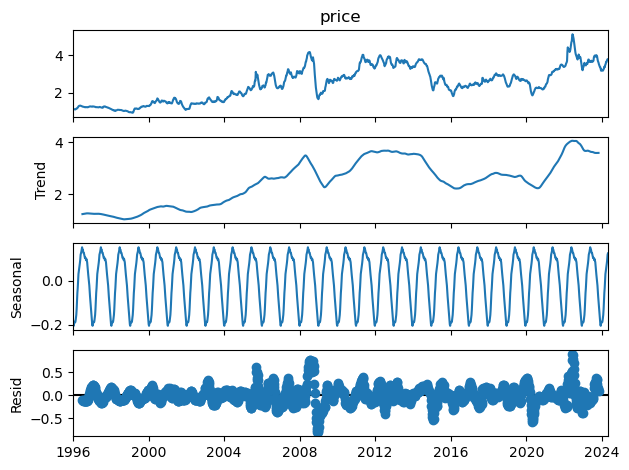

In [450]:
results = seasonal_decompose(oil_price.price)
results.plot()
plt.show()